# 机器学习

机器学习是一门人工智能的科学，该领域的主要研究对象是人工智能，特别是如何在经验学习中改善具体算法的性能。

# 分类

- 监督学习：从给定的训练数据集中学习出一个函数，当新的数据到来时，可以根据这个函数预测结果。监督学习的训练集要求是包括输入和输出，也可以说是特征和目标。训练集中的目标是由人标注的。常见的监督学习算法包括回归分析和统计分类。

监督学习和无监督学习的差别就是训练集目标是否人标注。他们都有训练集 且都有输入和输出

- 无监督学习与监督学习相比，训练集没有人为标注的结果。常见的无监督学习算法有生成對抗網絡（GAN）、聚类。

- 半监督学习介于监督学习与无监督学习之间。

- 增强学习通过观察来学习做成如何的动作。每个动作都会对环境有所影响，学习对象根据观察到的周围环境的反馈来做出判断。


# 线性回归

## 简单的线性回归

In [3]:
from sklearn.linear_model import LinearRegression

#训练集
X = [[6], [8], [10], [14], [18]]    
y = [[7], [9], [13], [17.5], [18]]    #对应着X中的每一个，为标签

#创建模型
model = LinearRegression()
model.fit(X, y)

#预测
new = [[12]]
pre = model.predict(new)
pre


array([[13.68103448]])

LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

1. 参数

- fit_intercept：布尔值，确定是否需要计算纵截距。False不计算
- normalize：布尔值。True表示训练样本在回归之前归一化
- copy_X: 布尔值。True表示复制X
- n_jobs：整数。任务并行时指定的CPU数量。-1为所有可用的CPU。

2. 属性

- coef_：权重
- intercept_: 纵截距

3. 方法

- fit(X, y[, sample_weight]):训练模型
- predict(X):用模型进行预测，返回预测值
- score(X, y[, sample_weight])：返回预测性能得分。不超过1，越大性能越好。如果为复数，则太差

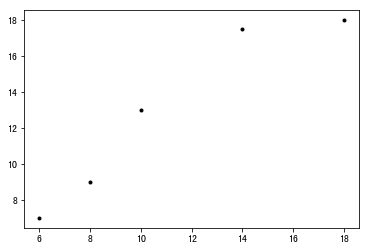

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
# y = ax + b
plt.figure()
plt.plot(X, y, 'k.')

In [14]:
model.coef_

array([[0.9762931]])

In [16]:
model.intercept_

array([1.96551724])

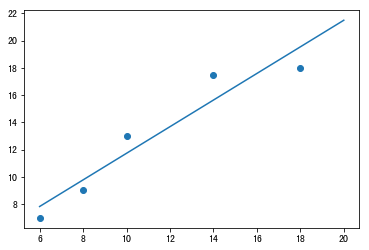

In [19]:
import numpy as np
x_test = np.linspace(6, 20, 10)
y_test = model.predict(x_test[:, np.newaxis])
plt.figure()
plt.scatter(X, y)
plt.plot(x_test, y_test)

In [21]:
# 评估预测效果，通常计算r-squared
# 通常，r-squared的值大于零，小于1，不能为复数。但，如果模型很差，利用sklearn中的计算方法，会小于

model.score(x_test.reshape(-1, 1), y_test.reshape(-1, 1))

1.0

In [89]:
# 对特征进行多项式操作，并进行线性回归
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

#制造数据集
import pandas as pd

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
data = pd.DataFrame({'x': x, 'y':y})

#构建训练集
train_data = data.sample(30)
train_data_x = train_data['x'].values.reshape(-1,1)
train_data_y = train_data['y'].values

poly_model.fit(train_data_x, train_data_y)    #训练

#构建测试集
test_data = data[(data-train_data).isna()].dropna()
test_data_x = test_data['x'].values.reshape(-1, 1)
predict_y = poly_model.predict(test_data_x)
predict_y.shape

(20,)

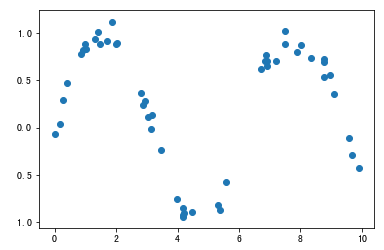

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x, y)

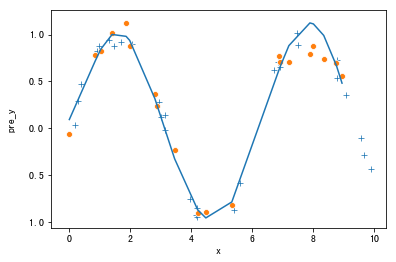

In [102]:
test_data['pre_y'] = predict_y.reshape(-1,1)
import seaborn as sns
sns.scatterplot(x='x', y='y', data=train_data, marker="+")
sns.scatterplot(x='x', y='y', data=test_data)
sns.lineplot(x='x', y='pre_y', data=test_data)

## 正则化

参考：https://charlesliuyx.github.io/2017/10/03/【直观详解】什么是正则化/

岭回归和LASSO是常用的两种线性回归正则化方法

## 岭回归（Ridge Regression）

在损失函数中加入L2范数惩罚项，以之控制线性模型的复杂程度，从而使模型更稳健，提高泛化能力

Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)


In [103]:
# 波士顿房价
#简单回归
from sklearn.datasets import load_boston
boston = load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [107]:
boston.data.shape

(506, 13)

In [108]:
boston.target.shape

(506,)

In [109]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(boston.data, boston.target)

pre = lin_reg.predict(boston.data[:10])
pre, boston.target[:10]

(array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
        25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9]))

In [112]:
lin_reg.score(boston.data, boston.target)

0.7406426641094094

In [113]:
#岭回归
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)    #alpha,值越大，则正则化项所占比重越大
ridge_reg.fit(boston.data, boston.target)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [114]:
ridge_reg.score(boston.data, boston.target)

0.739957023371629

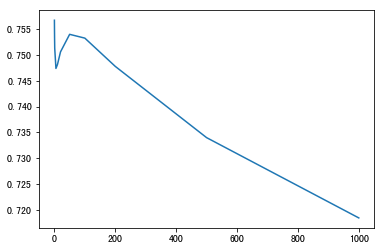

In [120]:
#探究alpha不同值，得到的回归结果
import seaborn as sns
def test_Ridge_alpha(*data):
    X_train, X_test, y_train, y_test = data
    alphas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 5, 10, 20, 50, 100, 200, 500, 1000]
    scores = []
    for i, alpha in enumerate(alphas):
        ridge_reg = Ridge(alpha=alpha)
        ridge_reg.fit(X_train, y_train)
        scores.append(ridge_reg.score(X_test, y_test))
    sns.lineplot(x=alphas, y=scores)
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=31)
test_Ridge_alpha(X_train, X_test, y_train, y_test)

## Lasso回归

跟岭回归相比，区别在于：惩罚项是基于L1的范数。可以将系数控制收缩到0，从而达到变量选择的效果。

Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [121]:
#例子
hitters = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/kaggle/Hitters.csv").dropna() 
hitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [122]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [123]:
#创建x和y
y = hitters.Salary
# 删除一些特征，并创建虚拟变量
X_ = hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
dummies = pd.get_dummies(hitters[['League', 'Division', 'NewLeague']])
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


Text(0, 0.5, 'weights')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


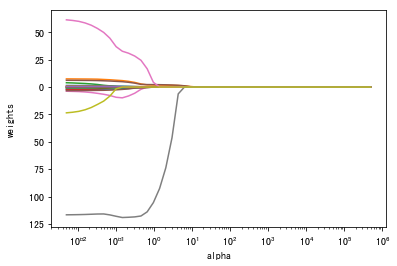

In [124]:
#训练Lasso模型
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter=10000, normalize=True)    #max_iter:最大迭代次数；
coefs = []

alphas = 10**np.linspace(6,-2,50)*0.5
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)    #权重

import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [127]:
#交叉验证
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)    #使用交叉验证而得到的alpha

print("Alpha=", lassocv.alpha_)
lasso.fit(X_train, y_train)
print("mse = ",mean_squared_error(y_test, lasso.predict(X_test)))
print("best model coefficients:")
pd.Series(lasso.coef_, index=X.columns)

Alpha= 2.402973015740077
mse =  104960.65853895503
best model coefficients:


AtBat           0.000000
Hits            1.082446
HmRun           0.000000
Runs            0.000000
RBI             0.000000
Walks           2.906388
Years           0.000000
CAtBat          0.000000
CHits           0.000000
CHmRun          0.219367
CRuns           0.000000
CRBI            0.513975
CWalks          0.000000
PutOuts         0.368401
Assists        -0.000000
Errors         -0.000000
League_N        0.000000
Division_W    -89.064338
NewLeague_N     0.000000
dtype: float64

## Logistic回归

Logistic回归，名为回归，其实是分类，二分类

LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None)

- pnalty='l2': 正则化策略

Text(0.5, 0, 'sepal_length (cm)')

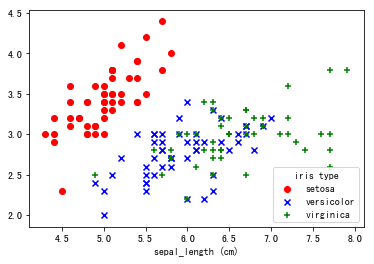

In [128]:
# 对鸢尾花数据进行分类
import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()    # 加载鸢尾花数据


sepal_length_list = iris.data[:, 0] # 花萼长度
sepal_width_list = iris.data[:, 1] # 花萼宽度

# 构建 setosa、versicolor、virginica 索引数组
setosa_index_list = iris.target == 0 # setosa 索引数组
versicolor_index_list = iris.target == 1 # versicolor 索引数组
virginica_index_list = iris.target == 2 # virginica 索引数组

plt.scatter(sepal_length_list[setosa_index_list], 
            sepal_width_list[setosa_index_list], color="red", marker='o', label="setosa")
plt.scatter(sepal_length_list[versicolor_index_list], 
            sepal_width_list[versicolor_index_list], color="blue", marker="x", label="versicolor")
plt.scatter(sepal_length_list[virginica_index_list], 
            sepal_width_list[virginica_index_list],color="green", marker="+", label="virginica")
# 设置 legend
plt.legend(loc="best", title="iris type")
# 设定横坐标名称
plt.xlabel("sepal_length (cm)")
# 设定纵坐标名称

In [131]:
from sklearn.linear_model import LogisticRegression

# 设置训练集和测试集
X_train, X_test , y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.5, random_state=1)

# 创建一个Logistic回归分类器
logr = LogisticRegression()

# 训练分类器
logr.fit(X_train, y_train)

# 预测所属类别
category = logr.predict(X_test)
category.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(75,)

In [133]:
logr.predict_proba(X_test)

array([[9.25911860e-01, 7.40462894e-02, 4.18502749e-05],
       [2.63241895e-01, 6.36925391e-01, 9.98327145e-02],
       [4.74696287e-02, 7.81788089e-01, 1.70742282e-01],
       [9.42061862e-01, 5.77881495e-02, 1.49988397e-04],
       [1.59261006e-03, 3.81270059e-01, 6.17137331e-01],
       [3.15375041e-02, 4.61731553e-01, 5.06730943e-01],
       [4.63410198e-03, 3.91155595e-01, 6.04210303e-01],
       [9.36128838e-01, 6.29494167e-02, 9.21745039e-04],
       [8.61967170e-01, 1.37083316e-01, 9.49513632e-04],
       [1.28751961e-03, 2.98795852e-01, 6.99916629e-01],
       [3.07228653e-02, 5.73351169e-01, 3.95925966e-01],
       [9.36793587e-01, 6.28632747e-02, 3.43138287e-04],
       [7.50897531e-04, 4.03822320e-01, 5.95426783e-01],
       [4.99796625e-02, 6.25632486e-01, 3.24387851e-01],
       [2.15570564e-02, 5.31400797e-01, 4.47042146e-01],
       [8.94448779e-01, 1.04701809e-01, 8.49412444e-04],
       [4.84428687e-02, 7.38259556e-01, 2.13297576e-01],
       [2.06366200e-02, 3.57221

In [135]:
#找一个样本，预测一下
flower = iris.data[np.newaxis, 0]
print("one flower:", flower)
print("predict: {0}".format(logr.predict(flower)))
print("predict_proba: {0}".format(logr.predict_proba(flower)))
#类别0，即setosa 。

one flower: [[5.1 3.5 1.4 0.2]]
predict: [0]
predict_proba: [[8.93171256e-01 1.06559545e-01 2.69199740e-04]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


([<matplotlib.axis.YTick at 0x11b2c8c18>,
 <a list of 17 Text yticklabel objects>)

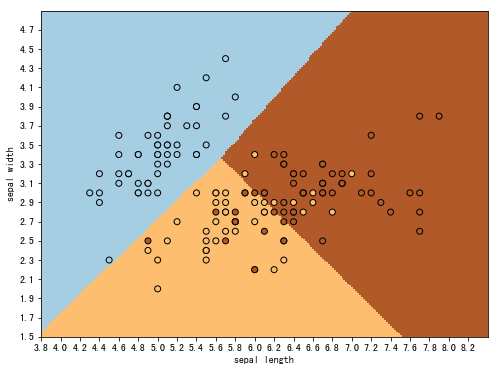

In [137]:
#将模型可视化

# 只考虑前两个特征，即花萼长度（sepal length）、花萼宽度（sepal width）
X = iris.data[:, 0:2]
y = iris.target

logreg = LogisticRegression(C=1e5)    #C：惩罚项系数的倒数，越小，正则化项越大
logreg.fit(X, y)

# 网格大小
h = 0.02

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5    # 将 X 的第一列（花萼长度）作为 x 轴，并求出 x 轴的最大值与最小值
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5    # 将 X 的第二列（花萼宽度）作为 y 轴，并求出 y 轴的最大值与最小值

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 调用 ravel() 函数将 xx 和 yy 平铺，然后使用 np.c_ 将平铺后的列表拼接
# 生成需要预测的特征矩阵，每一行的表示一个样本，每一列表示每个特征的取值
pre_data = np.c_[xx.ravel(), yy.ravel()]
Z = logreg.predict(pre_data)

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

# 设置坐标轴label
plt.xlabel("sepal length")
plt.ylabel("sepal width")

# 设置坐标轴范围
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# 设置坐标轴刻度
plt.xticks(np.arange(x_min, x_max, h * 10))
plt.yticks(np.arange(y_min, y_max, h * 10))


以上为常见的回归模型，更多其他模型，请参阅官方文档：

https://scikit-learn.org/stable/modules/linear_model.html

# 决策树

## 回归决策树

DecisionTreeRegressor(criterion=’mse’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)

- criterion: 默认为“mse”， 指定切分质量的评价标准。mse表示均方差
- splitter: 'best'表示最优的切分；'random'表示随机切分
- max_depth：树的最大深度
- min_samples_split：每个内部节点包含的最少的样本数

In [146]:
# 用回归决策树预测房价
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.tree import DecisionTreeRegressor

boston = load_boston()
X, y = boston.data, boston.target
features = boston.feature_names

regression_tree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)
regression_tree.fit(X,y)

score = np.mean(cross_val_score(regression_tree, X, y))
print('Mean squared error: {0}'.format(round(abs(score),2)))

Mean squared error: 0.47


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [156]:
#用回归树预测天气
weather_data = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/kaggle/weather.csv")
weather_data.head()

,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,FXXH,...,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,TX,TXH
0,20060701,85,25,27,50,10,10,2,80,9,...,83,21,0,57,98,3,29,13,297,15
1,20060702,102,29,32,50,13,10,5,100,15,...,83,20,0,52,84,3,31,13,301,14
2,20060703,99,28,31,50,11,20,1,100,11,...,83,19,0,47,75,22,24,15,301,15
3,20060704,123,12,18,40,12,10,3,60,12,...,82,1,1,55,92,24,30,15,320,14
4,20060705,229,9,23,40,8,10,1,120,8,...,82,14,5,69,93,3,44,14,296,15


In [157]:
weather_data.dtypes

YYYYMMDD     int64
DDVEC        int64
FHVEC        int64
FG           int64
FHX          int64
FHXH         int64
FHN          int64
FHNH         int64
FXX          int64
FXXH         int64
TG           int64
TN           int64
TNH          int64
T10N         int64
T10NH        int64
SQ           int64
SP           int64
Q            int64
DR           int64
RH           int64
RHX          int64
RHXH         int64
EV24         int64
PG           int64
PX           int64
PXH          int64
PN           int64
PNH          int64
VVN          int64
VVNH         int64
VVX          int64
VVXH         int64
NG          object
UG           int64
UX           int64
UXH          int64
UN           int64
UNH          int64
TX           int64
TXH          int64
dtype: object

In [158]:
weather_data['YYYYMMDD'] = pd.to_datetime(weather_data['YYYYMMDD'], format='%Y%m%d')
weather_data.head()

,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,FXXH,...,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,TX,TXH
0,2006-07-01,85,25,27,50,10,10,2,80,9,...,83,21,0,57,98,3,29,13,297,15
1,2006-07-02,102,29,32,50,13,10,5,100,15,...,83,20,0,52,84,3,31,13,301,14
2,2006-07-03,99,28,31,50,11,20,1,100,11,...,83,19,0,47,75,22,24,15,301,15
3,2006-07-04,123,12,18,40,12,10,3,60,12,...,82,1,1,55,92,24,30,15,320,14
4,2006-07-05,229,9,23,40,8,10,1,120,8,...,82,14,5,69,93,3,44,14,296,15


DDVEC Vector average wind direction in degrees (360 = north, 90 = east, 180 = south, 270 = west, 0 = windstorm / variable). See http://www.knmi.nl/kennis-en-datacentrum/achtergrond/klimatologischebrochures-en-boeken

FHVEC Vector average wind speed (in 0.1 m / s). See http://www.knmi.nl/kennis-en-datacentrum/achtergrond/klimatologischebrochures-en-boeken

FG Mean average wind speed (in 0.1 m / s)

FHX Highest Hourly Average Wind Speed ​​(in 0.1 m / s)

FHXH Hour box in which FHX has been measured

FHN Lowest Hourly Average Wind Speed ​​(in 0.1 m / s)

FHNH Hour box in which FHN is measured

FXX Highest wind speed (in 0.1 m / s)

FXXH Hour box in which FXX is measured

TG Average average temperature (0.1 degrees Celsius)

TN Minimum Temperature (0.1 degrees Celsius)

TNH Hour box where TN is measured

TX Maximum Temperature (0.1 degrees Celsius)

TXH Hourbox where TX is measured

T10N Minimum temperature at 10 cm height (0.1 degrees Celsius)

T10NH 6-hour period in which T10N is measured

SQ Sunshine duration (in 0.1 hours) calculated from the global radiation (-1 for <0.05 hours)

SP Percentage of longest possible sunshine duration

Q Global radiation (in J / cm2)

DR Duration of precipitation (in 0.1 hours)

RH Etching sum of the precipitate (in 0.1 mm) (-1 for <0.05 mm)

RHX Highest amount of precipitation (in 0.1 mm) (-1 for <0.05 mm)

RHXH Hour box in which RHX has been measured

PG Average air pressure reduced to sea level (in 0.1 hPa) calculated from 24 hour values

PX Highest hourly value of air pressure reduced to sea level (in 0.1 hPa)

PXH Hour box in which PX has been measured

PN Lowest hourly value of air pressure reduced to sea level (in 0.1 hPa)

PNH Hour box in which PN is measured

VVN Minimum sighted view

VVNH Hour box in which VVN is measured

VVX Maximum Visibility

VVXH Hour box in which VVX is measured

NG Average mean cloudiness (coverage of the upper air in eights, 9 = upper air invisible)

UG Mean average relative humidity (in percentages)

UX Maximum relative humidity (in percent)

UXH Hour box in which UX has been measured

UN Minimum relative humidity (in percentages)

UNH Hourbox where UN has been measured

EV24 Reference Vapor Evaporation (Makkink) (in 0.1 mm)

In [159]:
numtrain = weather_data.select_dtypes(include=[np.number])
corr = numtrain.corr()    #相关系数
corr
#plt.figure(figsize=(26,26))
#sns.heatmap(corr,vmax=1,square=True,annot=True)

,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,FXXH,TG,...,VVNH,VVX,VVXH,UG,UX,UXH,UN,UNH,TX,TXH
DDVEC,1.000000,-0.007575,0.022679,0.054040,-0.030794,-0.017389,0.097572,0.174812,-0.029278,0.107555,...,0.044643,0.121729,-0.028057,0.139174,0.157124,0.056288,0.089959,-0.014489,0.061564,-0.073805
FHVEC,-0.007575,1.000000,0.963035,0.860523,-0.024445,0.831160,0.088700,0.774556,0.001570,-0.131582,...,-0.016362,0.048630,-0.094156,-0.104487,-0.440476,0.057456,0.106580,-0.034408,-0.222190,-0.057055
FG,0.022679,0.963035,1.000000,0.914325,-0.029124,0.848378,0.111730,0.842715,-0.000793,-0.106395,...,-0.005919,0.081423,-0.092655,-0.114891,-0.443107,0.073220,0.091313,-0.029209,-0.196928,-0.071936
FHX,0.054040,0.860523,0.914325,1.000000,0.115639,0.676453,0.093419,0.904327,0.052233,-0.054052,...,-0.021920,0.158650,-0.065115,-0.147687,-0.357379,0.056156,0.002914,-0.031859,-0.120658,-0.086129
FHXH,-0.030794,-0.024445,-0.029124,0.115639,1.000000,-0.064445,-0.374498,0.054550,0.665154,0.075634,...,-0.168817,0.070694,0.156657,-0.080472,0.062457,-0.237157,-0.120165,0.142189,0.106305,0.148133
FHN,-0.017389,0.831160,0.848378,0.676453,-0.064445,1.000000,-0.055849,0.611147,-0.029288,-0.142905,...,-0.005693,-0.043519,-0.106048,-0.023083,-0.451254,0.042164,0.189257,-0.026310,-0.235024,-0.054568
FHNH,0.097572,0.088700,0.111730,0.093419,-0.374498,-0.055849,1.000000,0.112621,-0.328763,-0.046027,...,0.248058,0.033705,-0.086769,0.013231,-0.093485,0.383018,0.042909,-0.085185,-0.073343,-0.083204
FXX,0.174812,0.774556,0.842715,0.904327,0.054550,0.611147,0.112621,1.000000,0.089899,0.021745,...,-0.008622,0.205453,-0.052250,-0.113186,-0.283127,0.075460,0.001940,-0.018777,-0.050743,-0.111214
FXXH,-0.029278,0.001570,-0.000793,0.052233,0.665154,-0.029288,-0.328763,0.089899,1.000000,0.084674,...,-0.135692,0.039097,0.144500,-0.044141,0.050322,-0.212023,-0.078233,0.154263,0.110406,0.161969
TG,0.107555,-0.131582,-0.106395,-0.054052,0.075634,-0.142905,-0.046027,0.021745,0.084674,1.000000,...,-0.067540,0.436221,0.120786,-0.343938,0.066342,-0.046831,-0.419435,0.067302,0.973453,0.038264


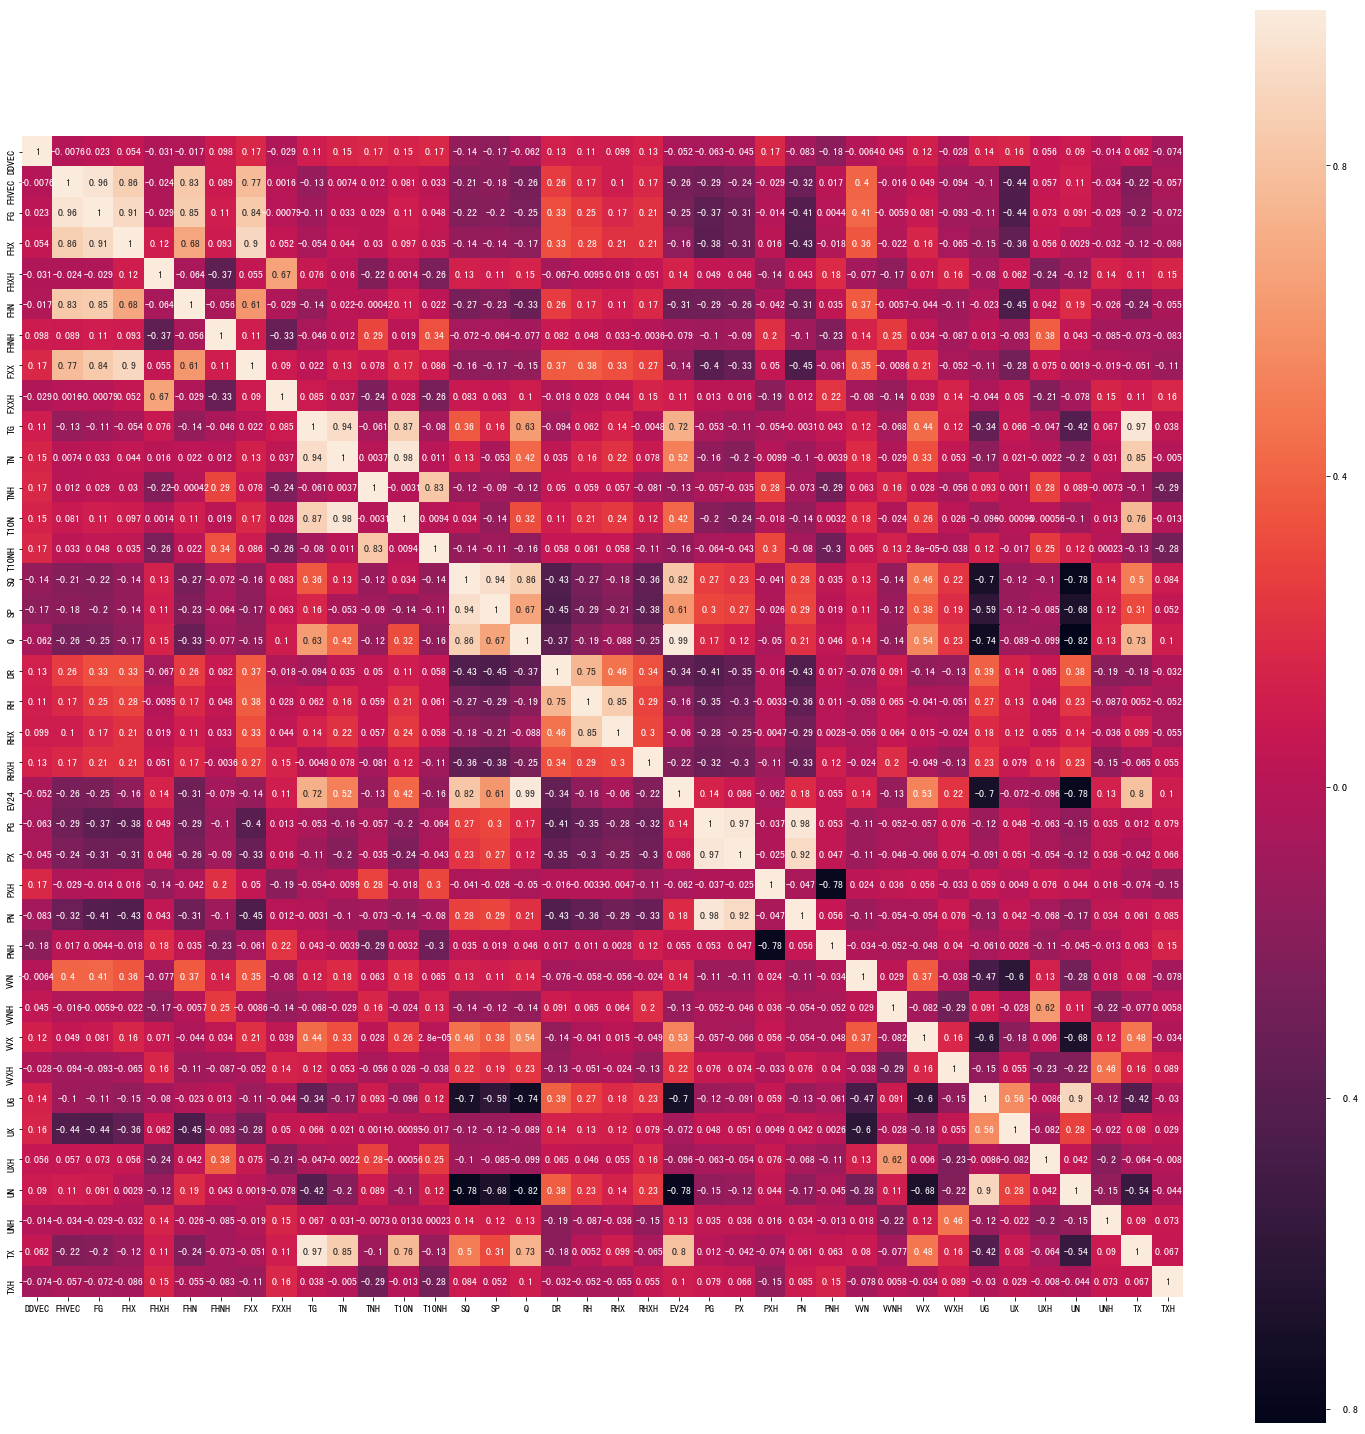

In [160]:
#制作反映相关性的热力图
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(26,26))
sns.heatmap(corr, vmax=1, square=True, annot=True)

In [161]:
# 对数据进行整理
corr = weather_data.corr().stack().abs()
corr = corr[corr.index.get_level_values(0) != corr.index.get_level_values(1)]
corr.sort_values(ascending=False)

EV24   Q        0.987246
Q      EV24     0.987246
T10N   TN       0.978334
TN     T10N     0.978334
PG     PN       0.976069
PN     PG       0.976069
PX     PG       0.974953
PG     PX       0.974953
TG     TX       0.973453
TX     TG       0.973453
FHVEC  FG       0.963035
FG     FHVEC    0.963035
SP     SQ       0.942774
SQ     SP       0.942774
TG     TN       0.935310
TN     TG       0.935310
PX     PN       0.915007
PN     PX       0.915007
FG     FHX      0.914325
FHX    FG       0.914325
FXX    FHX      0.904327
FHX    FXX      0.904327
UG     UN       0.897366
UN     UG       0.897366
T10N   TG       0.870659
TG     T10N     0.870659
FHX    FHVEC    0.860523
FHVEC  FHX      0.860523
SQ     Q        0.858605
Q      SQ       0.858605
                  ...   
TNH    T10N     0.003073
T10N   TNH      0.003073
UN     FHX      0.002914
FHX    UN       0.002914
PNH    RHX      0.002814
RHX    PNH      0.002814
UX     PNH      0.002574
PNH    UX       0.002574
TN     UXH      0.002166


In [162]:
del weather_data['NG']
del weather_data['YYYYMMDD']
del weather_data['TXH']
weather_data.shape

(4048, 37)

In [163]:
weather_data.head()

,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,FXXH,TG,...,VVN,VVNH,VVX,VVXH,UG,UX,UXH,UN,UNH,TX
0,85,25,27,50,10,10,2,80,9,228,...,21,3,83,21,57,98,3,29,13,297
1,102,29,32,50,13,10,5,100,15,240,...,70,3,83,20,52,84,3,31,13,301
2,99,28,31,50,11,20,1,100,11,237,...,75,22,83,19,47,75,22,24,15,301
3,123,12,18,40,12,10,3,60,12,248,...,65,24,82,1,55,92,24,30,15,320
4,229,9,23,40,8,10,1,120,8,240,...,56,24,82,14,69,93,3,44,14,296


In [167]:
#预测温度，即TX
X=weather_data.values[:,0:36]
X

array([[ 85,  25,  27, ...,   3,  29,  13],
       [102,  29,  32, ...,   3,  31,  13],
       [ 99,  28,  31, ...,  22,  24,  15],
       ...,
       [224,  49,  52, ...,   5,  58,  12],
       [218,  29,  39, ...,  23,  75,   5],
       [226,  36,  41, ...,   1,  57,  17]])

In [170]:
y=weather_data.values[:,36] /  10
y

array([29.7, 30.1, 30.1, ..., 21. , 20.5, 22.9])

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [185]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=8)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

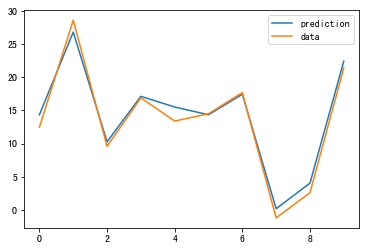

In [186]:
plt.plot(y_pred[:10], label = 'prediction')
plt.plot(y_test[:10], label = 'data')
plt.legend()

In [188]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=1000)
scores.mean()

-1.0637393007735219

## 分类决策树

DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)


In [189]:
#鸢尾花的分类举例
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state=1, stratify=iris.target)

In [190]:
tree_clf = DecisionTreeClassifier(criterion='gini',min_samples_leaf=5, min_samples_split=5)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred) 
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.9777777777777777


# 贝叶斯分类

- GaussianNB，高斯贝叶斯分类器，特征的条件概率符合高斯分布。
- MultinomialNB，多项式贝叶斯分类器，特征的条件概率符合多项式分布
- BernoulliNB，伯努利贝叶斯分类器，符合伯努利分布（二项式分布）

MultinomialNB, BernoulliNB,适用于离散特征。

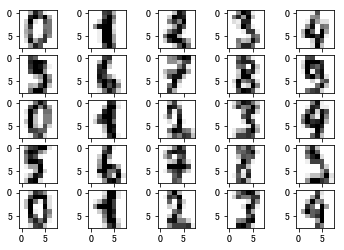

In [191]:
#手写字体识别举例
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

fig = plt.figure()
for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=0)

In [195]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gau_nb = GaussianNB()
gau_nb.fit(X_train, y_train)
y_pre = gau_nb.predict(X_test)

In [196]:
y_pre

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 3, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 3, 1, 3, 6, 7, 9, 0, 0, 5, 8, 6, 3, 0, 2, 3, 4, 1, 9,
       8, 6, 8, 8, 8, 3, 5, 1, 2, 1, 2, 1, 9, 7, 1, 3, 6, 0, 5, 3, 7, 5,
       1, 8, 9, 9, 3, 1, 7, 7, 4, 8, 5, 1, 5, 5, 8, 5, 8, 0, 7, 1, 7, 7,
       3, 4, 8, 9, 7, 7, 8, 1, 6, 5, 3, 5, 5, 4, 1, 7, 0, 6, 8, 5, 3, 3,
       1, 5, 9, 9, 5, 7, 5, 6, 8, 8, 6, 7, 6, 1, 5, 1, 7, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 7, 7, 6, 7, 6, 5, 6, 0, 8, 8, 3, 8, 6, 1, 0, 7, 1, 6,
       3, 3, 6, 7, 4, 3, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 3, 1, 1, 4, 8, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 8, 3, 3, 1, 6, 9, 8, 6, 3, 1, 2, 0, 7, 6, 1, 1,
       8, 7, 3, 7, 1, 5, 5, 7, 5, 3, 8, 7, 2, 7, 5, 5, 7, 0, 3, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 1, 6, 8, 8, 8, 4, 6, 7, 5, 2, 1,
       7, 3, 8, 4, 6, 9, 4, 5, 7, 3, 4, 6, 2, 3, 0,

In [198]:
y_test.shape

(540,)

In [205]:
r = y_pre[(y_test / y_pre) == 1]
r.size

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


400

In [206]:
400 / 540

0.7407407407407407

In [207]:
gau_nb.score(X_test, y_test)

0.8240740740740741

In [208]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mul_nb = MultinomialNB()
mul_nb.fit(X_train, y_train)
my_pre = mul_nb.predict(X_test)

In [209]:
mul_nb.score(X_test, y_test)

0.9055555555555556

In [210]:
mr = my_pre[(y_test / my_pre) == 1]
mr.size

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


445

In [211]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
ber_nb = BernoulliNB()
ber_nb.fit(X_train, y_train)
by_pre = ber_nb.predict(X_test)

In [212]:
ber_nb.score(X_test, y_test)

0.8388888888888889

In [213]:
br = by_pre[(y_test / by_pre) == 1]
br.size

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


409

In [224]:
#对文本进行分类
#获取新闻分组数据集
from sklearn import datasets
news = datasets.fetch_20newsgroups(subset='all')

In [225]:
#比较简单的操作
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

#创建词袋
vec = CountVectorizer()
X = vec.fit_transform(news.data)

#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, news.target, test_size=0.3, random_state=123)

#训练模型
mul_nb = MultinomialNB()
mul_nb.fit(X_train, y_train)

#预测
y_pre = mul_nb.predict(X_test)

In [230]:
mul_nb.score(X_test, y_test)

0.8388751326494517

# k最近邻

k-Nearest Neighbor(KNN)是一种分类与回归方法。

## kNN分类

KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)

In [245]:
###简单举例

#两个特征
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
weather_encoded = le.fit_transform(weather)
temp_encoded = le.fit_transform(temp)
label = le.fit_transform(play)
features = list(zip(weather_encoded, temp_encoded))

from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(features, label)

pre = knc.predict([[0, 2]])   #0: overcast, 2:Mild
pre

array([1])

In [241]:
print(weather_encoded)
print(temp_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [239]:
label

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [254]:
#葡萄酒分类
from sklearn import datasets
wine = datasets.load_wine()

In [256]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [257]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [258]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [260]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [261]:
from sklearn import metrics
print("准确率:",metrics.accuracy_score(y_test, y_pred))

准确率: 0.7592592592592593


In [262]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=7)   #7
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("准确率:",metrics.accuracy_score(y_test, y_pred))


准确率: 0.8518518518518519


## kNN回归

KNeighborsRegressor(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)

下面举例，综合使用多种模型

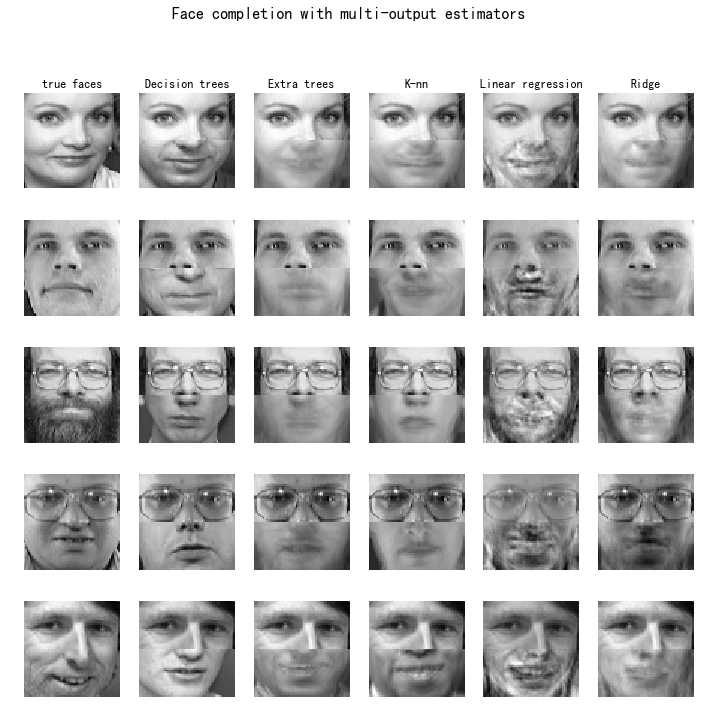

In [269]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor

# 加载数据集
data = fetch_olivetti_faces()
targets = data.target

data = data.images.reshape((len(data.images), -1))
# 分割训练集和测试集
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

##### Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32, random_state=0),
    "Decision trees": DecisionTreeRegressor(),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()

for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

# 聚类

无监督学习：将数据集划分为若干个不相交的子集（簇cluster）

## K均值聚类

KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)

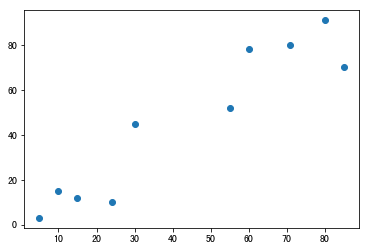

In [270]:
import matplotlib.pyplot as plt

#理解聚类
X = np.array([[5,3],
              [10,15],
              [15,12],
              [24,10],
              [30,45],
              [85,70],
              [71,80],
              [60,78],
              [55,52],
              [80,91],])

plt.scatter(X[:,0],X[:,1], label='True Position') 

In [271]:
#对上述数据聚类
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=2)  #2，分为两簇
kmeans.fit(X)
print(kmeans.cluster_centers_)     #每簇的中心

[[16.8 17. ]
 [70.2 74.2]]


In [272]:
print(kmeans.labels_)    #每个样本所属的簇

[0 0 0 0 0 1 1 1 1 1]


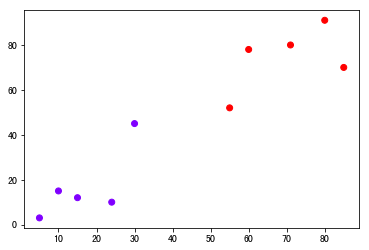

In [273]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')

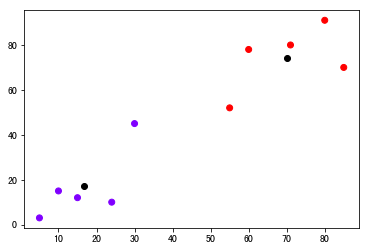

In [274]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')  #画出中心

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

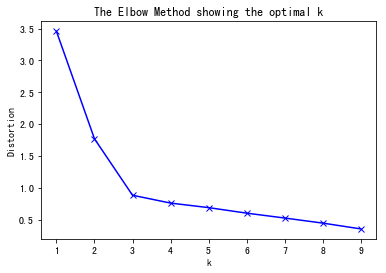

In [276]:
#n_clusters是一个需要根据经验尝试的整数，不同的簇，影响聚类的效果。
from scipy.spatial.distance import cdist    #用于计算每个数据点和簇中心的举例
from sklearn.cluster import KMeans

import numpy as np

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# 图中拐点表示最佳值，k=3
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

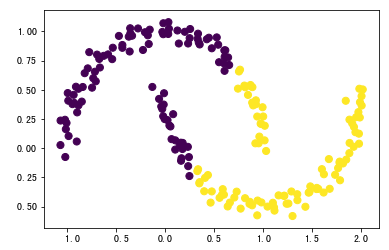

In [277]:
#K均值聚类，适合于比较均匀的簇，并且数量不多
#如果遇到下述，则不能使用
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


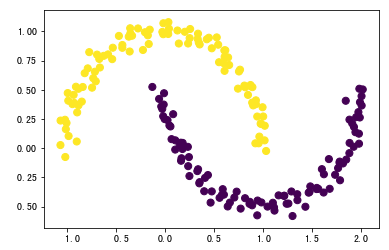

In [278]:
#使用另外一种聚类算法
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

更多聚类算法：https://scikit-learn.org/stable/modules/clustering.html

# 支持向量机

支持向量机（英语：support vector machine，常简称為SVM）。是一个分类器

有监督学习：

给定一组训练实例，每个训练实例被标记为属于两个类别中的一个或另一个，SVM训练算法建立一个将新的实例分配给两个类别之一的模型，使其成为非概率二元线性分类器。

无监督学习：

当数据未被标记时，它会尝试找出数据到簇的自然聚类，并将新数据映射到这些已形成的簇。将支持向量机改进的聚类算法被称为支持向量聚类。

- 优点：SVM本质上是非线性方法，适用于样本量比较少的数据。可以提高泛化性能，解决高维度问题，避免神经网络结构选择和局部小点问题。
- 不足：对缺失数据敏感，对非线性问题没有通用解决方案，选择核函数要谨慎，计算复杂度高。对大数据不利

## 线性支持向量机分类

二分类

LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’, fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)


In [280]:
#简单的例子
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC

# train
X = [{'city':'Gothenburg', 'month':'July'},
     {'city':'Gothenburg', 'month':'December'},
     {'city':'Paris', 'month':'July'},
     {'city':'Paris', 'month':'December'}]
y = ['rain', 'rain', 'sun', 'rain']

#test
Xtest = [{'city':'Gothenburg', 'month':'June'},
         {'city':'Gothenburg', 'month':'November'},
         {'city':'Paris', 'month':'June'},
         {'city':'Paris', 'month':'November'}]

ytest = ['rain', 'rain', 'sun', 'rain']

pipeline = make_pipeline(DictVectorizer(), LinearSVC())
pipeline.fit(X, y)
ypre = pipeline.predict(Xtest)
ypre



array(['rain', 'rain', 'sun', 'sun'], dtype='<U4')

In [282]:
accuracy_score(ytest, ypre)

0.75

## 非线性支持向量机分类

SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

kernal:

- "rbf":默认值，高斯核函数
- "linear":线性核
- "poly": 多项式核
- "sigmoid": 
- 'precomputed':提供kernel matrix或者一个可调用对象

In [285]:
#示例
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix 

bdata = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/bankdata/bill_authentication.csv")
bdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [286]:
X = bdata.drop('Class', axis=1)
y = bdata['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [287]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
 
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[219   4]
 [  3 186]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       223
           1       0.98      0.98      0.98       189

   micro avg       0.98      0.98      0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



In [288]:
accuracy_score(y_test, y_pred)

0.9830097087378641

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 1.0, 'SVC with RBF kernel')

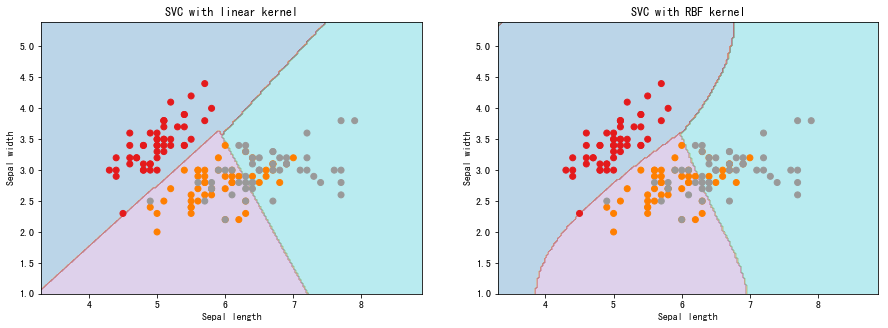

In [289]:
#鸢尾花综合示例
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, :2] # 只使用前两个特征.
y = iris.target

# 绘制图示，表示分类划分
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

# SVC模型
C = 1.0 # SVM 的惩罚系数，默认为1
svc = svm.SVC(kernel='linear', C=C, decision_function_shape='ovr').fit(X, y)  #线性核
Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')


C = 1.0 
svc = svm.SVC(kernel='rbf', C=C, decision_function_shape='ovr').fit(X, y)   #rbf

Z = svc.predict(X_plot)
Z = Z.reshape(xx.shape)

plt.subplot(122)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')

由上可见，非线性支持向量机分类的特点。

## 线性支持向量机回归、非线性支持向量机回归

LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss=’epsilon_insensitive’, fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=0, random_state=None, max_iter=1000)

SVR(kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


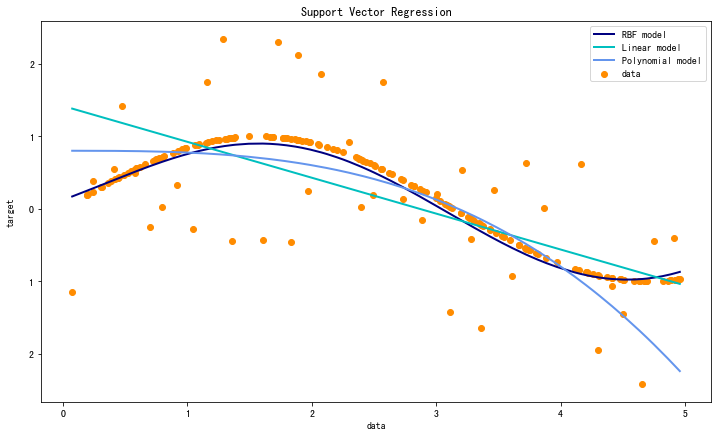

In [290]:
#for example
from sklearn.svm import SVR

X = np.sort(5 * np.random.rand(200, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(40))

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)    #等同于LinearSVR
svr_poly = SVR(kernel='poly', C=1e3, degree=3)

y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

lw = 2
plt.figure(figsize=(12, 7))
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()

# 集成学习

融合多种算法。

流程：

1. 产生一组“个体学习器”
2. 使用某种策略将它们结合起来

根据个体学习器的生成方式，分两种：

- Boosting：个体学习器之间存在强以来关系，必须串行生成
- Bagging：个体学习器之间不存在强依赖关系，可同时生成
- stacking：针对元学习器的输出分为两种，一种是投票法，一种是训练出多个模型之后，将模型输出的结果作为输入，训练出一个元学习器(meta learner), 得到最终的输出

![](./nine01.png)

## AdaBoost分类

AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)

- base_estimator=None, 基础分类器对象，默认为DecisionTreeClassfier。必须要支持样本权重学习。
- n_estimators=50, 分类器数量。如果训练集完美训练好了，会体检结束算法。
- learning_rate=1.0 减少每一步的步长。越小，则需要的分类器数量越多。

In [299]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

#iris
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
abc = AdaBoostClassifier(learning_rate=0.1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [300]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9555555555555556


### AdaBoost回归

AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss=’linear’, random_state=None)

默认基础回归对象DecissionTreeRegressor

loss:损失函数

- 'linear':线性损失函数
- 'square'：平方损失函数
- 'exponential'：指数损失函数

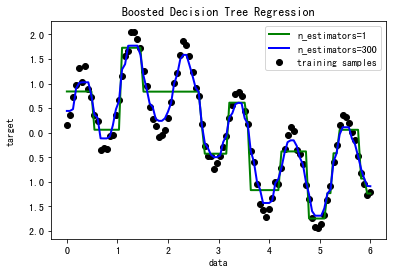

In [302]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")

plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="b", label="n_estimators=300", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()


## 随机森林

- RandomForestClassifier
- RandomForestRegressor

In [308]:
#乳腺癌筛查的示例
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pdb

# File Paths
INPUT_PATH = "/Users/qiwsir/Documents/Codes/DataSet/breast-cancer/breast-cancer-wisconsin.data"
OUTPUT_PATH = "/Users/qiwsir/Documents/Codes/DataSet/breast-cancer/breast-cancer-wisconsin.csv"

HEADERS = ["CodeNumber", "ClumpThickness", "UniformityCellSize", "UniformityCellShape", "MarginalAdhesion", 
           "SingleEpithelialCellSize", "BareNuclei", "BlandChromatin", "NormalNucleoli", "Mitoses", "CancerType"]

def read_data(path):
    """
    Read the data into pandas dataframe
    :param path:
    """
    data = pd.read_csv(path)
    return data

def get_headers(dataset):
    """
    dataset headers
    :param dataset:
    :return:
    """
    return dataset.columns.values

def add_headers(dataset, headers):
    """
    Add the headers to the dataset
    :param dataset:
    :param headers:
    :return:
    """
    dataset.columns = headers
    return dataset

def data_file_to_csv():
    """
    :return:
    """

    # Headers
    headers = ["CodeNumber", "ClumpThickness", "UniformityCellSize", "UniformityCellShape", "MarginalAdhesion",
               "SingleEpithelialCellSize", "BareNuclei", "BlandChromatin", "NormalNucleoli", "Mitoses",
               "CancerType"]
    # Load the dataset into Pandas data frame
    dataset = read_data(INPUT_PATH)
    # Add the headers to the loaded dataset
    dataset = add_headers(dataset, headers)
    # Save the loaded dataset into csv format
    dataset.to_csv(OUTPUT_PATH, index=False)
    print("File saved ...!")
    
def split_dataset(dataset, train_percentage, feature_headers, target_header):
    """
    Split the dataset with train_percentage
    :param dataset:
    :param train_percentage:
    :param feature_headers:
    :param target_header:
    :return: train_x, test_x, train_y, test_y
    """

    # Split dataset into train and test dataset
    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers], dataset[target_header],
                                                        train_size=train_percentage)
    return train_x, test_x, train_y, test_y

def handel_missing_values(dataset, missing_values_header, missing_label):
    """
    Filter missing values from the dataset
    :param dataset:
    :param missing_values_header:
    :param missing_label:
    :return:
    """

    return dataset[dataset[missing_values_header] != missing_label]

def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier()
    clf.fit(features, target)
    return clf


def dataset_statistics(dataset):
    """
    Basic statistics of the dataset
    :param dataset: Pandas dataframe
    :return: None, print the basic statistics of the dataset
    """
    print(dataset.describe())



    # Load the csv file into pandas dataframe
dataset = pd.read_csv(OUTPUT_PATH)
    # Get basic statistics of the loaded dataset
dataset_statistics(dataset)

    # Filter missing values
dataset = handel_missing_values(dataset, HEADERS[6], '?')
train_x, test_x, train_y, test_y = split_dataset(dataset, 0.7, HEADERS[1:-1], HEADERS[-1])

    # Train and Test dataset size details
print("Train_x Shape :: ", train_x.shape) 
print("Train_y Shape :: ", train_y.shape)
print("Test_x Shape :: ", test_x.shape)
print("Test_y Shape :: ", test_y.shape)

    # Create random forest classifier instance
trained_model = random_forest_classifier(train_x, train_y)
print("Trained model :: ", trained_model)
predictions = trained_model.predict(test_x)

for i in range(0, 5):
    print("Actual outcome :: {} and Predicted outcome :: {}".format(list(test_y)[i], predictions[i]))

print("Train Accuracy :: ", accuracy_score(train_y, trained_model.predict(train_x)))
print("Test Accuracy  :: ", accuracy_score(test_y, predictions))
print(" Confusion matrix ", confusion_matrix(test_y, predictions))

         CodeNumber  ClumpThickness  UniformityCellSize  UniformityCellShape  \
count  6.980000e+02      698.000000          698.000000           698.000000   
mean   1.071807e+06        4.416905            3.137536             3.210602   
std    6.175323e+05        2.817673            3.052575             2.972867   
min    6.163400e+04        1.000000            1.000000             1.000000   
25%    8.702582e+05        2.000000            1.000000             1.000000   
50%    1.171710e+06        4.000000            1.000000             1.000000   
75%    1.238354e+06        6.000000            5.000000             5.000000   
max    1.345435e+07       10.000000           10.000000            10.000000   

       MarginalAdhesion  SingleEpithelialCellSize  BlandChromatin  \
count        698.000000                698.000000      698.000000   
mean           2.809456                  3.217765        3.438395   
std            2.856606                  2.215408        2.440056   
min

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## 其它

1. 基于梯度提升树

    - GradientBoostingClassifier
    - GradientBoostingRegressor
    

我的盲区


# 半监督学习


# 人工神经网络、深度学习

- 感知机神经网络
- 反向传递
- 学习矢量量化
- 自组织映射网络
- ...

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

常用框架列表

- Caffe
- Keras    # sudo pip3 install keras
- Cxxnet
- Mxnet
- Tensorflow    #
- Theano：基于Theano的框架:
    - pylearn2
    - Lasagne
    - Block’s
- Joone, 07年之后不再维护了。
- CUDA convnet
- CUDA convnet2
- Deeplearning4j
- Torch7，Python版本Pytorch
- Neon


In [310]:
import keras

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [309]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'